In [2]:
import pandas as pd
import numpy as np
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df=pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df.SNOW.rename(dates))
snow

/tmp/ipykernel_33669/966294185.py:4: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(url)


1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

# Plotting with a Series
For Jupyer cell magic: `%matplotlib inline%`


In [3]:
%matplotlib inline

The following plot attributes for a series : `bar, barh, box, hist, kde, line & pie`

### 14.3 Histograms
- for continuous numeric data, histogram gives insight how data is distributed:

<Axes: ylabel='Frequency'>

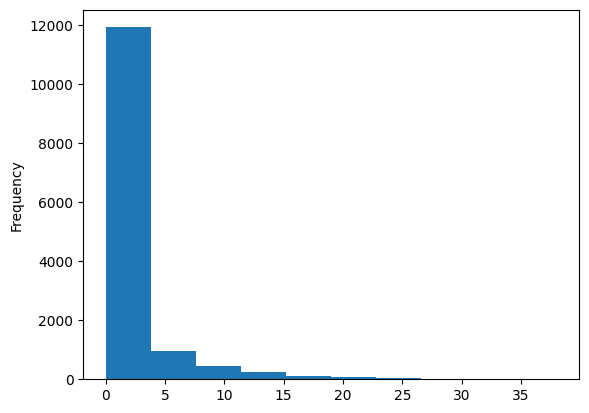

In [4]:
snow.plot.hist()

The snow data is heavily skewed, we might want to drop the zero entries and try again:

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

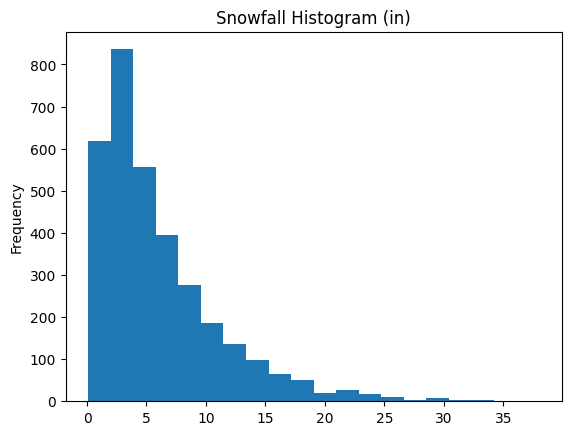

In [5]:
snow[snow>0].plot.hist(bins= 20, title='Snowfall Histogram (in)')

### 14.4 Box Plot
- view distribution of the data

<Axes: >

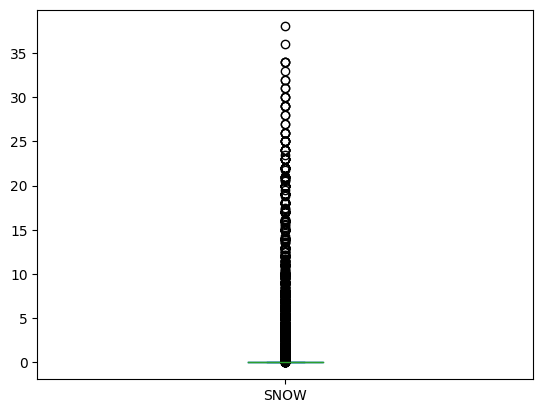

In [6]:
snow.plot.box()

will look more boxxy, if we limit it to snow amounts during january (ignoring zero):

<Axes: >

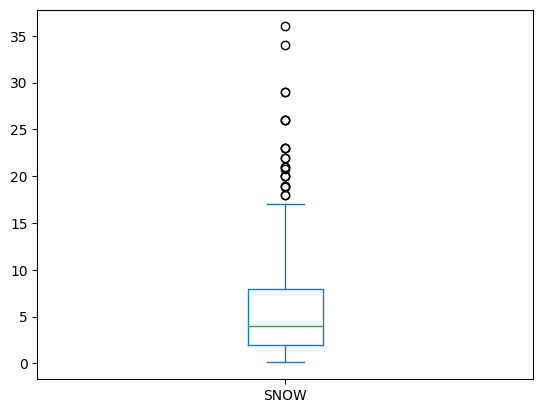

In [8]:
(snow
    [lambda s:(s.index.month ==1) & (s>0)]
    .plot.box())

### 14.5 Kernel Density Estimation Plot
KDE: smoothed histogram:

<Axes: ylabel='Density'>

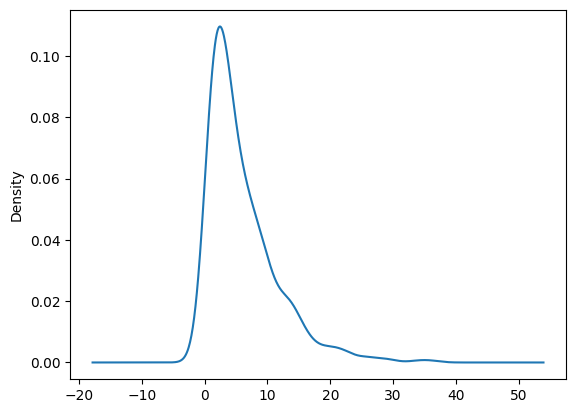

In [9]:
(snow
    [lambda s:(s.index.month ==1) & (s>0)]
    .plot.kde())

<Axes: >

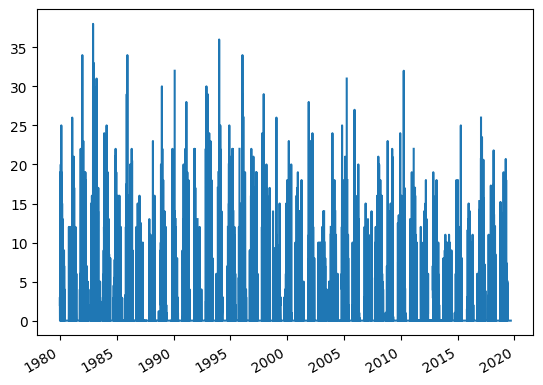

In [10]:
### 14.6 Line Plots
snow.plot.line()

<Axes: >

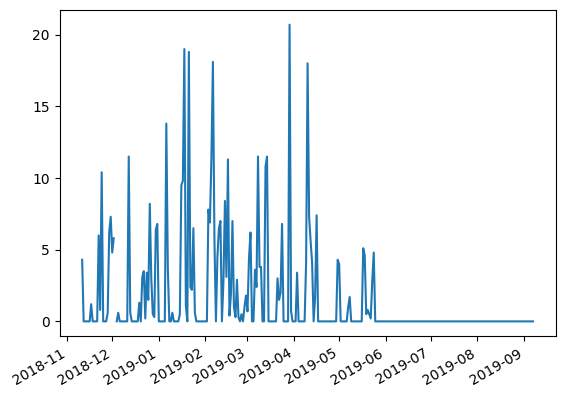

In [11]:
(snow
    .iloc[-300:]
    .plot.line())

<Axes: >

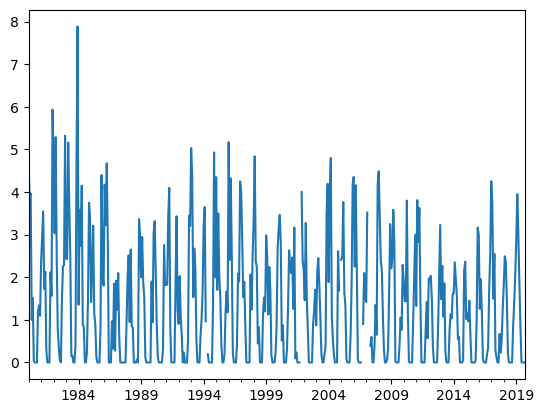

In [12]:
(snow
 .resample('M')
 .mean()
 .plot.line())

### 14.7 Line plots with Multiple Aggregations
- use `.quantile` method to pull out 50%, 90% and 99% values which returns a multiindex
- chain `.unstack` method, pulls out inner index (one with the quantile names) into columns and create a df that has a column for each quantile, then plot:

<Axes: >

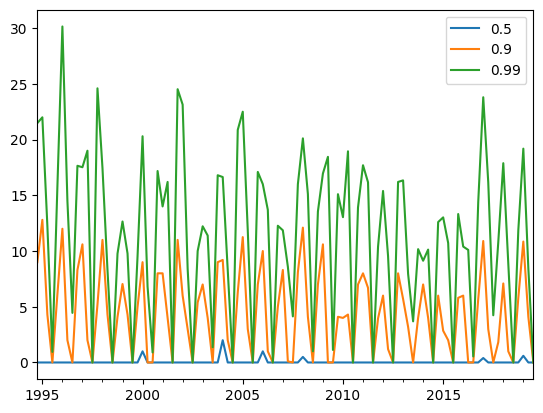

In [14]:
(snow
 .resample('Q')
 .quantile([.5, .9, .99])
 .unstack()
 .iloc[-100:]
 .plot.line()
 )

### 14.8 Bar Plots
- useful for comparing values:

In [16]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 )

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

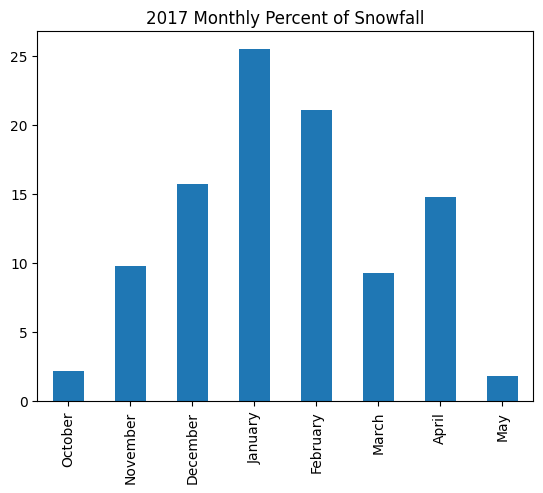

In [17]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.bar(title='2017 Monthly Percent of Snowfall')
 )

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

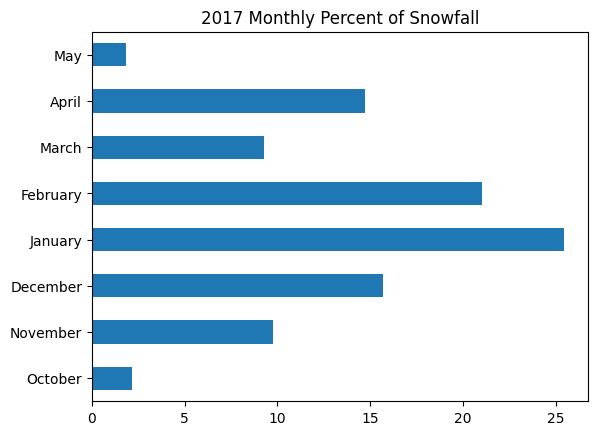

In [18]:
season2017 = (snow.loc['2016-10':'2017-05'])
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title='2017 Monthly Percent of Snowfall')
 )

In [21]:
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

<Axes: xlabel='make'>

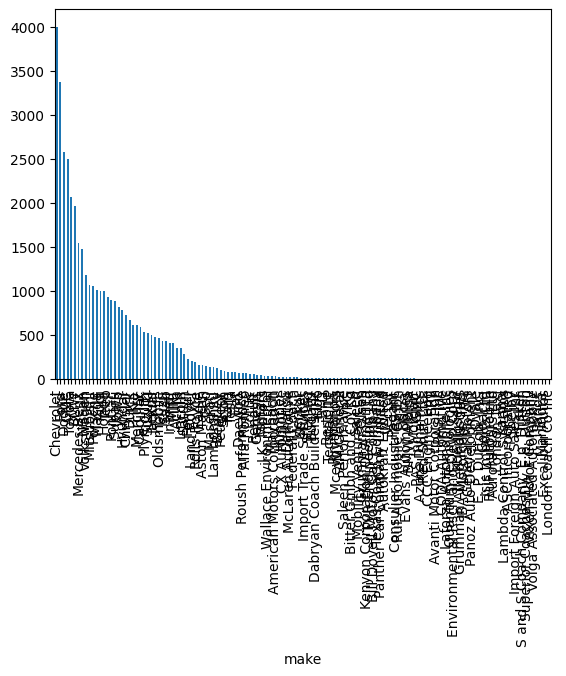

In [22]:
make.value_counts().plot.bar()

<Axes: ylabel='make'>

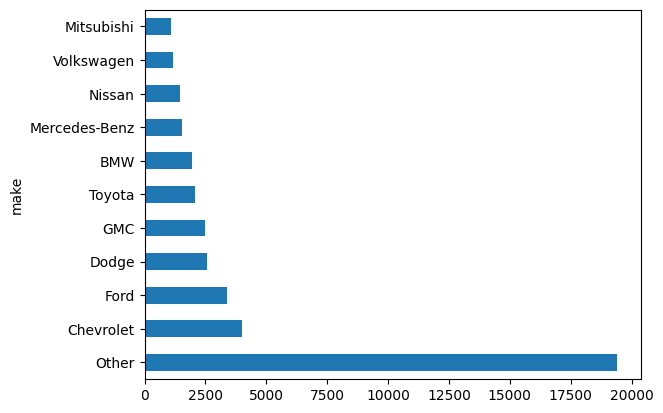

In [23]:
#limit to 10 makes;
top10 = make.value_counts().index[:10]
(make
    .where(make.isin(top10), 'Other')
    .value_counts()
    .plot.barh())

### 14.9 Pie Plots


<Axes: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

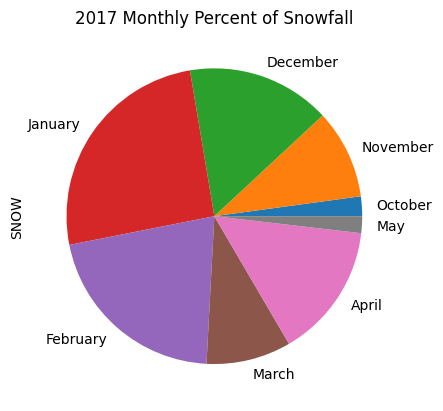

In [24]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.pie(title='2017 Monthly Percent of Snowfall')
    )

### 14.10 Styling
```
import matplotlib
import seaborn as sns
color_palette = ["#440154", "#482677", "#404788", "#33638d", "#287d8e",
    "#1f968b", '#29af7f', '#55c667', '#73d055', '#b8de29', '#fde725']
fp = matplotlib.font_manager.FontProperties(
    fname = '/Fonts/roboto/Roboto-Condensed.ttf')
with sns.plotting_context(rc= dict(font ='Roboto', palette=color_palette )):
    fig, ax = plt.subplots(dpi=600 , figsize =(10,4))
    snow.plot.hist()
    fig.savefig('snowhist.png', dpi=600, bbox_inches = 'tight')

```